## In case you missed the first email, good, ignore it. Second email tells you to do so as well!

## Final check-in survey

## -------------

# Probabilities and Monte Carlo

In [1]:
# PHZ3150- Fall 2021

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy.optimize import curve_fit

## Monte Carlo (MC): repeated random sampling from your code to get a numerical result ; got its name from the casino of Monte Carlo



### Traditional MC methods:
- numerical integrations of functions that can be graphed and don’t have simple analytic solution 
- simulations of random variables using random samples from a uniform distribution 
- estimation of uncertainties in the best-fit parameters of analytical models used to fit data 


### The basic idea is that if you do repeated random sampling you can make numerical estimations of unknown parameters, like, e.g. :
- you can use MC to calculate $\pi$
- you can also use MC to do a numerical integration with random numbers (see below)
- you can calculate the error bars for your best-fit model of a dataset

### e.g., let's define the unit circle:


In [3]:
R = 1 


### draw a random 10,000,000 numbers for x and y in the range 0 to 1. Check if $x^2 + y^2 \lesssim R^2$. If so, add one to your counter

In [4]:
N = 10000000
c = 0

for i in range(0,N):
    x = np.random.random()
    y = np.random.random()
    r = x ** 2 + y ** 2
    if r<=1:
        c+=1

In [5]:
# what is c?
print( c )

7854184


In [6]:
# what is c/N?

print( c / N )

0.7854184


In [7]:
# what is 4* c/N?
print( 4 * c / N )

3.1416736


### what happened here? Would it work with N = 100 or 1000? 

In [8]:
N = 100
c = 0

for i in range(0,N):
    x = np.random.random()
    y = np.random.random()
    r = x ** 2 + y ** 2
    if r<=1:
        c+=1
        
print( 4 * c / N )

3.12


In [9]:
N = 1000
c = 0

for i in range(0,N):
    x = np.random.random()
    y = np.random.random()
    r = x ** 2 + y ** 2
    if r<=1:
        c+=1
        
print( 4 * c / N )

3.136


### the larger the number of random points we sample the closer we are to the real value of $\pi$

### We can also use MC for integration:

### let's integrate $f(x) = \int_0^1 e^x dx$

### by hand you expect: $e^1 - e^0 =$

In [10]:
print( np.exp(1)- np.exp(0) )

1.718281828459045


### I will use MC here; going for 5 different sample sizes in one go:

In [11]:
for N in 10**np.array( [1, 2, 4, 6, 8 ] ):  #-->you can try to push it to a larger array; 
                                            # my laptop crashes (lack of RAM) after ~10^8

    x = np.random.uniform( 0, 1, N )        #--> create an array of N random numbers between 0 and 1
    
    mean_val = np.mean( np.exp( x ) )         #--> get the mean value of the random  e^x
    
    print('%10d %.6f' % ( N, mean_val ) )

        10 1.712636
       100 1.715796
     10000 1.709861
   1000000 1.718271
 100000000 1.718263


### once again, the larger our random sample from which we draw is, the better our MC estimation for the integral

### you can also use MC to approximate the Gaussian distribution:

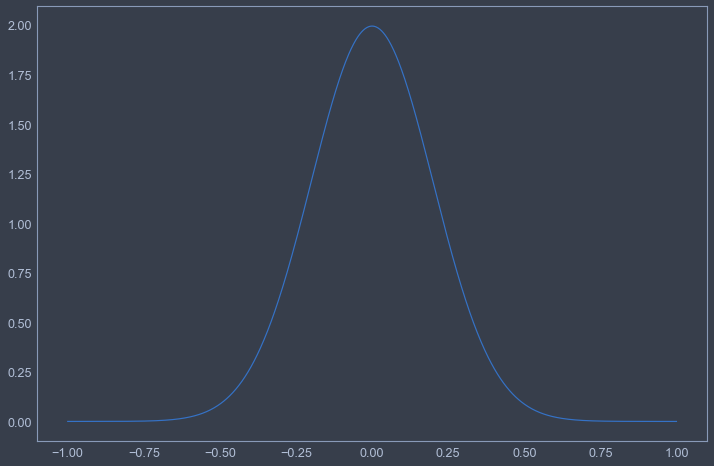

In [12]:
# first make a real Gaussian for comparison:

x = np.linspace(-1, 1, 1000 )

mu    = 0.0
sigma = 0.2


# 1/sqrt(2*pi*sigma**2) * exp(-(x-mu)**2/(2*sigma**2))

a1 = -( x - mu ) **2 / ( 2 * sigma **2 )
a2 = 1 / np.sqrt(2 * np.pi * sigma**2 )


plt.figure( figsize = (12 , 8) )
plt.plot( x, a2 * np.exp( a1 ) )

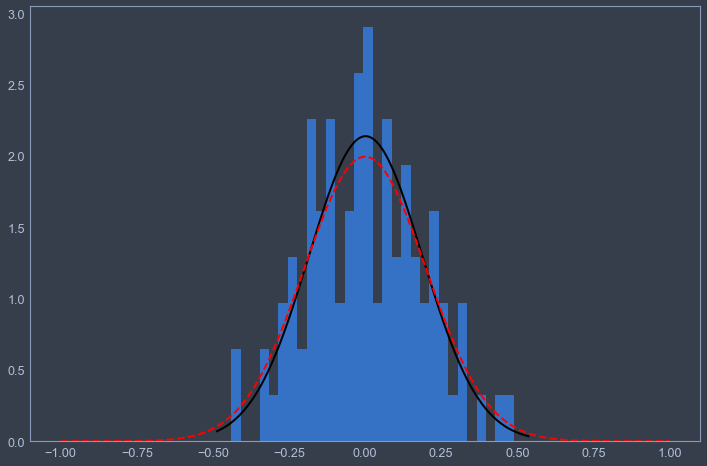

In [13]:
#let's try with MC:

data = np.random.normal(loc=mu, scale=sigma, size = 100) #--> experiment with small sample size; 
#the smaller (larger) it is  the further (close) you will be from (to) the real distrubution

mean,std=norm.fit(data)

plt.figure( figsize = ( 12, 8 ) )

plt.hist(data, bins=30,  density=True, stacked=True)

xmin, xmax = plt.xlim()

x2 = np.linspace(xmin, xmax, 400)
y = norm.pdf(x2, mean, std)
plt.plot(x2, y, color = 'black', linewidth = 2)
plt.plot(x, a2 * np.exp( a1 ),color = 'red',linestyle = '--', linewidth = 2)




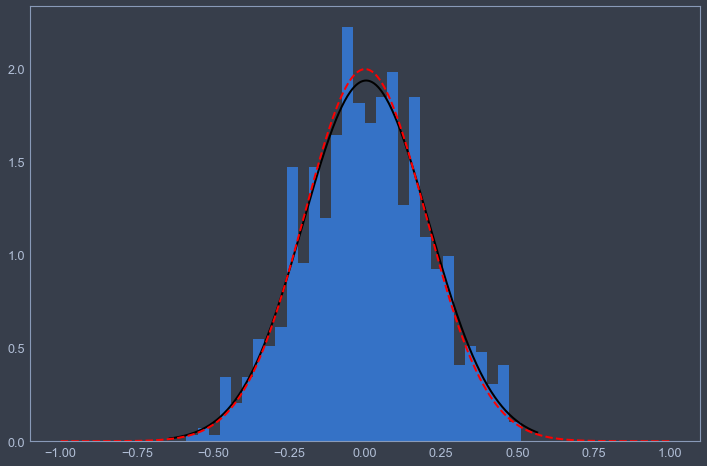

In [14]:
#let's try with MC:

data = np.random.normal(loc=mu, scale=sigma, size = 800) #--> experiment with small sample size; 
#the smaller (larger) it is  the further (close) you will be from (to) the real distrubution

mean,std=norm.fit(data)

plt.figure( figsize = ( 12, 8 ) )

plt.hist(data, bins=30, density=True, stacked=True)

xmin, xmax = plt.xlim()

x2 = np.linspace(xmin, xmax, 400)
y = norm.pdf(x2, mean, std)
plt.plot(x2, y, color = 'black', linewidth = 2)
plt.plot(x, a2 * np.exp( a1 ),color = 'red',linestyle = '--', linewidth = 2)




### Now, assume we have some data we observed and we want to find our best-fit model like before, but also the uncertainty in our estimated best-fit parameters:
- generate N synthetic "observations" based on your real observations 
- find best-fit parameters for your synth observations
- find posterior distribution of your best-fit params ($a \pm da$ )

In [15]:
#dataset from our "fitting_data" class:
t = np.arange(1,22,2)
s = [ 11.80487185,  46.07654076 , 57.27329417 , 94.31029188, 146.48665845,
 185.33660777, 236.5500788,  318.94164082, 388.45874659, 475.7783416,
 555.86899163] 

In [16]:
def distance_with_acceleration_print(t, u, c, a):
    """Calculate the distance travelled with at a constant speed u for a known time
    and constant acceleration a."""
    
#    print ("speed=",u, "acceleration=",a, 'constant=',c)
    return c + u* t + 0.5 * a * t**2 

In [17]:
t2, v2 = curve_fit( distance_with_acceleration_print, t , s, 
                       absolute_sigma = True, sigma = np.zeros( len( t ) ) + 12 )


Text(0, 0.5, 'Distance')

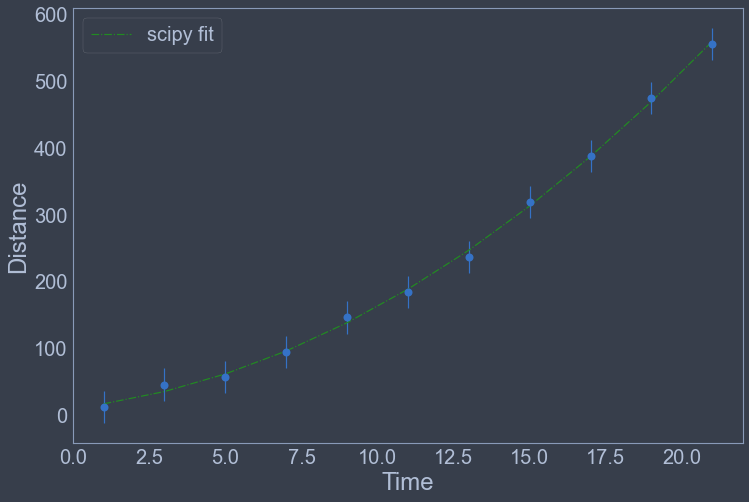

In [18]:
plt.figure( figsize = ( 12, 8 ) )

plt.errorbar( t, s, yerr = 24., linestyle = 'none', marker='o', markersize = 8 )

plt.plot( t, distance_with_acceleration_print( t, *t2), linestyle='-.', color='forestgreen',label ='scipy fit')

plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Distance', fontsize = 24)



In [19]:
print( t2 )

[ 5.22052118 10.93110039  1.99318001]


### good fit, but what are the uncertainties in our c, u and a?

In [20]:
N_trials = 10000
c_fits = np.array( [])

In [21]:
for q in range( N_trials ):
    x_test = np.random.uniform(1 , 22, len( t ))
    y = 11. + 5.2 * x_test + 0.5 * 2. * x_test**2 
    y_test = y + 0.3 * np.random.random( len (y ) ) 
    
    try:
        t3, v3 = curve_fit( distance_with_acceleration_print , 
                       x_test ,y_test ,absolute_sigma = True, sigma = np.zeros( len( t ) ) + 12) 
    #    print( [t1[0]] )
    except:
        continue
    
    if np.size( c_fits ) < 1:
        c_fits = np.copy( t3 )
    else:
        c_fits = np.vstack(( c_fits, t3 ))
#    u_fits = u_fits.extend( t1 [1] )
#    a_fits = a_fits.extend( t1 [2] )

In [22]:
c_fits.shape

(10000, 3)

In [23]:
print( np.mean( c_fits[ :, 0 ] ), np.std( c_fits[ :, 0 ] ) )
print( np.mean( c_fits[ :, 1 ] ), np.std( c_fits[ :, 1 ] ) )
print( np.mean( c_fits[ :, 2 ] ), np.std( c_fits[ :, 2 ] ) )

5.199667545278318 0.026175916076557715
11.151945442495297 0.14249377486763057
2.000020614932297 0.002200471354873089


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

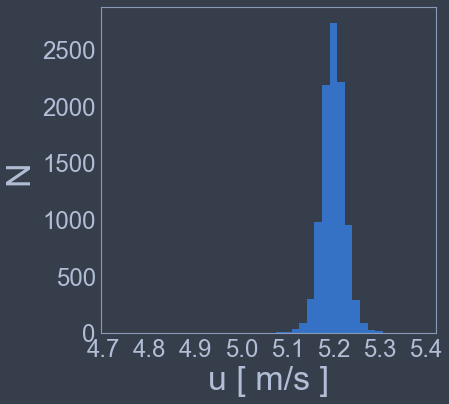

In [24]:
plt.figure( figsize = ( 6, 6 ) )
plt.hist( c_fits[ :, 0 ], bins = 40 )
plt.xlabel('u [ m/s ]', fontsize = 34 )
plt.ylabel('N ', fontsize = 34 )
plt.xticks( fontsize = 24 )
plt.yticks( fontsize = 24 )

(array([   0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

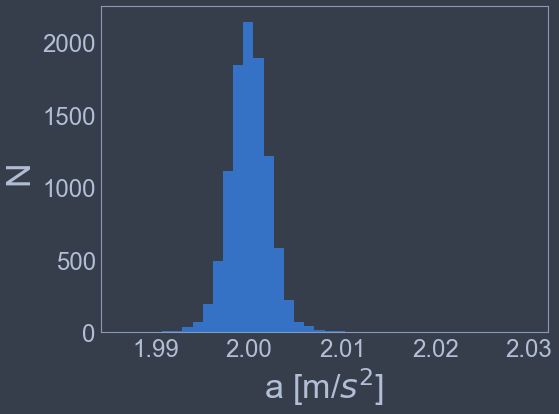

In [25]:
plt.figure( figsize = ( 8,6 ) )
plt.hist( c_fits[ :, 2 ], bins = 40 )
plt.xlabel('a [m/$s^2$]', fontsize = 34 )
plt.ylabel('N ', fontsize = 34 )
plt.xticks( fontsize = 24 )
plt.yticks( fontsize = 24 )

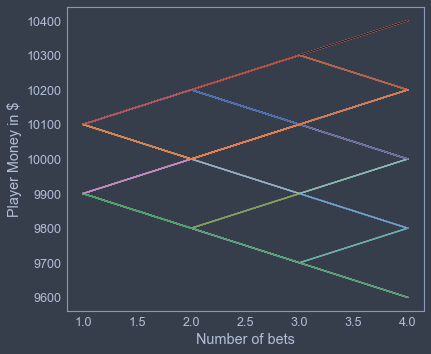

The player starts the game with $10,000 and ends with $10020.0


In [26]:
#MC example from https://towardsdatascience.com/the-house-always-wins-monte-carlo-simulation-eb82787da2a3

#Create function for simulating die roll 
#The die can take values from 1 to 100. If the number is between 1 #and 51, the house wins. 
#If the number is between 52 and 100, the player wins.
def rolldice():
    import random   
    dice = random.randint(1,100)
    
    if dice <=51:
        return False
    elif dice >51 & dice <=100:
        return True
    
    
    
#Define a function for the play which takes 3 arguments :
#1. total_funds = total money in hand the player is starting with
#2. wager_amount = the betting amount each time the player plays
#3. total_plays = the number of times the player bets on this game
def play(total_funds, wager_amount, total_plays):
    
    #Create empty lists for :
    # 1.Play_number and 
    # 2.Funds available
    # 3.Final Fund
    Play_num = []
    Funds = []
#Start with play number 1
    play = 1
#If number of plays is less than the max number of plays we have set
    while play < total_plays:
        #If we win
        if rolldice():
            #Add the money to our funds
            total_funds = total_funds + wager_amount
            #Append the play number
            Play_num.append(play)
            #Append the new fund amount
            Funds.append(total_funds)
        #If the house wins
        else:
            #Add the money to our funds
            total_funds = total_funds - wager_amount 
            #Append the play number
            Play_num.append(play)
            #Append the new fund amount
            Funds.append(total_funds)
            
        #Increase the play number by 1
        play = play + 1
        
    #Line plot of funds over time
    plt.plot(Play_num,Funds)
    Final_funds.append(Funds[-1])
    return(Final_funds)


#Call the function to simulate the plays and calculate the remaining #funds of the player after all the bets
#Intialize the scenario number to 1
x=1
#Create a list for calculating final funds
Final_funds= []
while x<=100:
    ending_fund = play(10000,100,5)
    x=x+1
#Plot the line plot of "Account Value" vs "The number of plays"
plt.ylabel('Player Money in $')
plt.xlabel('Number of bets')
plt.show()
#Print the money the player ends with
print("The player starts the game with $10,000 and ends with $" + str(sum(ending_fund)/len(ending_fund)))

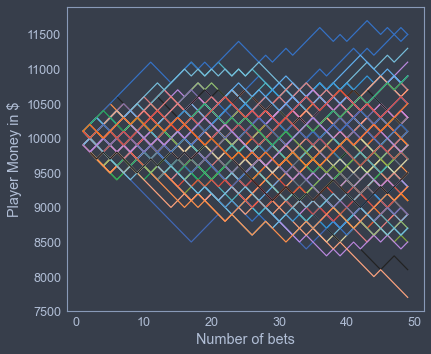

The player starts the game with $10,000 and ends with $9804.0


In [27]:
#Call the function to simulate the plays and calculate the remaining #funds of the player after all the bets
#Intialize the scenario number to 1
x=1
#Create a list for calculating final funds
Final_funds= []
while x<=100:
    ending_fund = play(10000,100,50)
    x=x+1
#Plot the line plot of "Account Value" vs "The number of plays"
plt.ylabel('Player Money in $')
plt.xlabel('Number of bets')
plt.show()
#Print the money the player ends with
print("The player starts the game with $10,000 and ends with $" + str(sum(ending_fund)/len(ending_fund)))

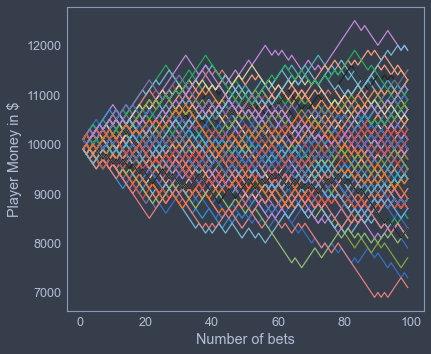

The player starts the game with $10,000 and ends with $9752.0


In [28]:
#Call the function to simulate the plays and calculate the remaining #funds of the player after all the bets
#Intialize the scenario number to 1
x=1
#Create a list for calculating final funds
Final_funds= []
while x<=100:
    ending_fund = play(10000,100,100)
    x=x+1
#Plot the line plot of "Account Value" vs "The number of plays"
plt.ylabel('Player Money in $')
plt.xlabel('Number of bets')
plt.show()
#Print the money the player ends with
print("The player starts the game with $10,000 and ends with $" + str(sum(ending_fund)/len(ending_fund)))

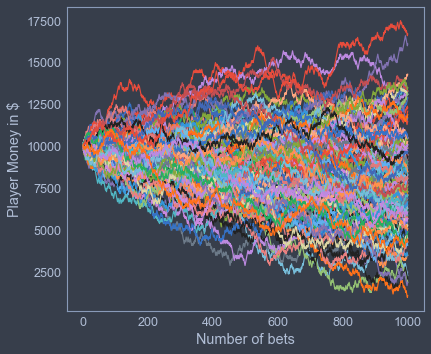

The player starts the game with $10,000 and ends with $8102.0


In [29]:
#Call the function to simulate the plays and calculate the remaining #funds of the player after all the bets
#Intialize the scenario number to 1
x=1
#Create a list for calculating final funds
Final_funds= []
while x<=100:
    ending_fund = play(10000,100,1000)
    x=x+1
#Plot the line plot of "Account Value" vs "The number of plays"
plt.ylabel('Player Money in $')
plt.xlabel('Number of bets')
plt.show()
#Print the money the player ends with
print("The player starts the game with $10,000 and ends with $" + str(sum(ending_fund)/len(ending_fund)))

### Markov Chain Monte Carlo

#### A very brief overview of MCMC
- random walk/ change of a variable that you want to fit
- allow a parameter to vary in a 'random' way but every step depends *only* on the step before and the ones that came before that
- there is a probability that a given step can happen ; figure out which steps are visited not too often, which are happening all the time
- try multiple starting points; make sure you have enough steps in your chain to lose info of the start *and* be able to explore enough parameter space for each variable
- Bayesian priors & posterior distributions


<img src="../plots/mcmc_corner.png" width=350 height=150 />
source: https://emcee.readthedocs.io/en/stable/tutorials/line/

### if you want to delve into the topic UCF has courses you can follow (e.g., MAP6469 )

# ----------------------------

## Overview lecture

### A couple of highlights before we go in details:

- Python is an intuitive language: most commands are exactly what you would say (list--> list; print--> print(); interpolate --> interp; etc)
- Unlike other languages (e.g., C, FORTRAN) Python is interpreted (no compiler needed)
- Has no declarations 
- Does the memory management under the hood 
- Widely used in science and industry, so it has a lot of already developed routines for numerical and science problems
- It's free!
- Can easily interact with modules from other languages (C/Fortran)
- Can do network programming, encryption, databases, ML --> super useful in industry and science!
- Python has a wealth of functions to do what you want (numpy, scipy ....)


### Most of the things you want to do have probably already been done by someone. If you are stuck, don't try to reinvent the wheel: search python.org, numpy.org, scipy.org, matplolib.org, stackoverflow.com etc for a solution from someone else


### Import all the packages you need at the start of your code

In [30]:
import numpy as np
import matplotlib.pyplot as plt

### sometimes you might not need the whole package, but one function out of it:

In [31]:
from scipy.stats import chisquare

### or you might want to import functions from a .py file you stored them in:

In [32]:
from FtoC import FtoC
# from my_supoort_functions import function1, function2
# from hwN_support_funct import *

ModuleNotFoundError: No module named 'FtoC'

## A) Keeping a good work log is good practice. Also important for coding is to keep good comments in your code:

### compare this:

In [ ]:
a = 5 * np.arange( 20 )
b = 0.5 * a + np.arange( 20 )**2. * 1e-2
c = 100.    + np.linspace( 1, 30, 100 )
d = np.interp( c, a, b )

### with this:

In [ ]:
# get the x and y observations:
a = 5 * np.arange( 20 )
b = 0.5 * a + np.arange( 20 )**2. * 1e-2

# get the new x grid:
c = 100.    + np.linspace( 1, 30, 100 )

# interpolate y to the new x grid:
d = np.interp( c, a, b )

## B) Python has objects that are mutable: lists, numpy arrays, dictionaries  ; 
###                                               and immutable: tuples, strings. 

### B1) numpy arrays:

In [ ]:
a = np.linspace( 2, 3, 10)

b = np.arange( 2, 3, 0.2)

c = np. zeros( 5 )

d = np.zeros ( ( 2, 3))

In [ ]:
print( a )

In [ ]:
print( b )

In [ ]:
print( c )

In [ ]:
print( d )

#### what does it means that they are mutable?

In [ ]:
d[ :, 0 ] = 1
d[ :, 1 ] = 2
d[ :, 2 ] = 3
print( d )

### B2) lists:

In [ ]:
this_is_empty_list = []

In [ ]:
this_is_another_list= [ 5 ]
print( id( this_is_another_list ) )

In [ ]:
print( this_is_empty_list, this_is_another_list )

### now I want to start populating the empty list for locations i = 0 to 5 with i**2:

In [ ]:
for i in range( 6 ):
    this_is_empty_list.append( i**2 )

In [ ]:
print( this_is_empty_list )

### and I want to add this list as two elements to end of the another_list  [ 6, 7 ] :

In [ ]:
this_is_another_list.extend( [ 6,7 ] )

In [ ]:
print( id( this_is_another_list ) )

### B3) dictionaries:

In [ ]:
my_empty_dict = {}

In [ ]:
my_other_dict = {'Mary': 2 }

In [ ]:
print( id( my_empty_dict ) )
print( my_empty_dict )

my_empty_dict['test 1']  = 5.
my_empty_dict['test 2']  = 10.

print( my_empty_dict )
print( id( my_empty_dict ) )

In [ ]:
my_other_dict[ 'George' ] = 7

print( my_other_dict )

### What if I want to loop over the elements of the dictionary using their key words?

In [ ]:
for key in my_other_dict:
    print( key, my_other_dict[ key ] )

In [ ]:
for key, value in my_empty_dict.items():
    print( key, value )

In [ ]:
print( my_empty_dict.values( ) )

In [ ]:
print( my_empty_dict.keys( ) )

In [ ]:
print( my_empty_dict.items( ) )

### What if I have a list of names, and I want to check if their grade exists in my dictionary?

In [ ]:
person = [ 'Mike', 'Mary', 'Peter' ]

for i in person:
    for key in my_other_dict:
        if key == i:
            print( key, my_other_dict[ key ] )

### B4) tuples:

In [ ]:
my_empty_tuple = ()

In [ ]:
my_tuple = ( 3, 2, 1 )

In [ ]:
print( id( my_empty_tuple) )

my_empty_tuple = ( 5, )

print( id( my_empty_tuple ) )

In [ ]:
print( my_empty_tuple )

In [ ]:
my_tuple[ 2 ] = -3 

### B5) strings:

In [ ]:
my_string = 'my oh my'

In [ ]:
print( my_string ) 
print( id( my_string ) )

In [ ]:
my_string = my_string + ', what a day!'

print( my_string ) 
print( id( my_string ) )

#### but, I can still slice it:

In [ ]:
my_string[ : 5 ]

## C) For things that you want to do repeatedly you can create your own functions. You can store them in a .py file if you will use them more often. 

### Modules are packages of functions.

In [ ]:
def my_function( a, b ):
    """Writting an informative docstring is super important. It will help you later on to 
    remember what your function is supposed to be doing. 
    Input: a, b parameters
    Output: parameter c """
    
    q = np.log( a ) + b
    
    return q

### the variable names you use in your main code can be different from the ones in the funct; just make sure that you keep the consistent in either block of code 

In [ ]:
a1 = np.linspace( 4, 8, 20 )
a2 = a1 ** 2

s = my_function( a1, a2 )

print( s )

### remember, if you forget what a function does you can get its docstring to figure it out:

In [ ]:
print( my_function.__doc__ )

In [ ]:
help( np.min )

## D) If, For and While statements are powerful for controlling the flow of data in your program. 

### For example:

In [ ]:
a = [ 2, 4, 5,  8, 11, 12, 14, 16, 21, 24 ]

for i in a:
    print( i )


In [ ]:
for i in a:
    print( a[ i ] )
#why?

In [ ]:
for i in range( len( a ) ):
    print( a[ i ] )

In [ ]:
for i in a:
    if i % 2 == 0 :
        print( i, ' is even' )
    else: 
        print( i, ' is odd')
    

In [ ]:
b = [ 2, 4, 5,  8, 11, 12, -4, 14, 16, 21, 24 ]

i = 0

while b[ i ] > 0 :
    print( b[ i ] )
    i+=1

## E) Bugs are an inevitability but you can use some tricks to make your life easier:
- When creating your code make sure you test it often and with different test cases. Smaller batches are much easier to debug than larger ones.
- Once you see there is a bug, debug: print() variables or use Python's debugger: breakpoint()

### sometimes bugs will make your code seem to run as it should, but results don't make sense:

In [ ]:
# e.g., we saw how a typo can be a bug:
def volume(radius):
    """Calculates the volume of a sphere of radius R  
    Input: R (m)
    Output: V (m$^3$)"""

    
    volumee = (4./3.) * np.pi * (radius**3)   #----typo!
    
    return(volume)

print( volume( 10 ) )

# or how an accidental omission can make the code appear to work, whike it doesnt:

num = int(input("Give me a number:"))

if num == 10 or 1:
    print('the number is 10 or 1')
else:
    print('the number is not 10 or 1')


### sometimes bugs will make your code crash:

In [ ]:
def volume(radius):
    """Calculates the volume of a sphere of radius R  
    Input: R (m)
    Output: V (m$^3$)"""

    
    volume = (4./3.) * np.pi * (radius**3)   #----typo!
    
    print( 'the volume is, volume )
    
    return(volume)


### often bugs can be associated with the indentation of your code:

In [ ]:
# make code that scans array F and prints the last value at each step 
# and the mean of the array up to that point:

F = np.linspace( 1, 12, 20)
print( F )

In [ ]:
for i in range( len( F ) ):
    print( F[ i ] )
print( np.mean( F[ : i +1 ] ) )

### E2) While we are at the topic, when you design a code you want to make sure than you make it such that it doesn't crash when someone else runs it. Not only making it bug-free, but also making sure that 'accidental bugs' in runtime can be diagnosed and treated.

- use 'try:', raise custome made exceptions and errors that will report an issue, but let the code run 
- use a log to record your warnings, errors and critical/ fatal bugs every time the code runs

In [ ]:
names = [ 'emma.txt', 'first_data_read_plot.dat', 'Iamnothere.txt', 'distances_midterm.dat' ]

# scan all names
for nm in names:           
    
    # try to open the file:
    try:
        fin = open( '../all_data/'+ nm )
        print( ' Opened file ', nm )
        
    # if file is not there print an error message but do continue to next file:
    except:
        print( 'File', nm, 'not there' )

## F) speaking of opening files: remember that I/O can be a bottleneck in your code; but you will need inevitably to read in data at some point

### F1) we have seen how to read text from a file in different ways:

In [ ]:
f = open( '../all_data/emma.txt' , 'r')  # remember the letter you use is important!

emma_text = f.read()

f.close()


In [ ]:
print( emma_text [ : 500] )

In [ ]:
with open( '../all_data/emma.txt') as f:
    print( f.readline() )
    print( f.readline() )
    print( f.readline() )
    print( f.readline() )

In [ ]:
with open( '../all_data/emma.txt') as f:
    for q in range( 4 ):
        print( f.readline() )
    

In [ ]:
m = 0

with open( '../all_data/emma.txt') as f:
    for line in f:
        print( line )
        m = m + 1
        
        if m == 4:
            break

### remember that break, pass etc can be useful for breaking loops or only doing things when you want:

In [ ]:
m = 0 
with open( '../all_data/emma.txt') as f:
    for line in f:
        
        print( m % 2 )
        if m % 2 == 0:
            print( line )
        else:
            pass 
            
        m = m + 1
        if m >= 12:
            break

### F2) When you read data numpy can help:

In [ ]:
a = np.loadtxt( '../all_data/first_data_read_plot.dat' )

b = np.genfromtxt( '../all_data/first_data_read_plot.dat' )

## G) When you are interested in doing numerical or scientific computations you have numpy and scipy at your disposal. 

In [ ]:
# slice the data array and assign each column to a named variable:
wav = a[ :, 0 ]
f1  = a[ :, 1 ]
f2  = a[ :, 2 ]

In [ ]:
# you can now do all shorts of things to your data:
print( wav,  f1 )
print( 3 * f2[ 10 ] - 2 * f1[ 10 ] )

In [ ]:
b = np.array( [ [ 2, 3 ], [ 5, 4 ] ])

c = np.linspace(1, 16, 6).reshape((3, 2))

In [ ]:
print( b )

print( c )

In [ ]:
## you can even fit models to data:

In [33]:
# you have observations:

x = np.linspace( 1, 16, 6 )
y = 5 * x  + 2.1


#what is the best fit model a * x + b ?


from scipy.optimize import curve_fit



In [34]:
def myfunct( x, a, b ):
    """fits your function"""
    
    return a * x + b

s1, v1 = curve_fit( myfunct, x, y, absolute_sigma = True, sigma = np.zeros( len( x ) ) + 2 )
print( s1 )

[5.  2.1]


OSError: sleigh_speeds.dat not found.

In [ ]:
# or if you want to do it manually:

a1 = np.arange( 1, 10, 0.5 )
a2 = np.arange( 1, 3, .1 )

chs = np.zeros( ( len( a1 ), len( a2 ) ) )

for i in range( len( a1 ) ):
    for j in range( len( a2 ) ):
        ym = a1[ i ] * x + a2[ j ]
        chs[ i, j ] = np.sum( ( ym - y ) ** 2. / ym**2 )


mn = np.where( chs == np.min( chs ) )

print( a1[ mn[ 0 ] ], a2[ mn[ 1 ] ] )


## H) last but not least, good plots are important to show your results and convey your mesage to your audience

In [ ]:
# you have observations 
x = np.linspace( 1, 16, 26 )
y = 5 * x  + 2.1

# you now have another observation at different x points
x2 = np.linspace( 2, 16, 42 )
y2 = 5 * x2  + 2.1

# and you want to test if they are coming from the same distribution

#first interpolate y from the x to the x2 grid so that we compare apples to apples:
yb = np.interp( x2, x, y)


#then plot to compare:

plt.figure( figsize = ( 8, 8 ) )
plt.plot( x, y , color = 'blue' , marker = 'o', markersize = 8 , label = 'data')
plt.plot( x2, y2, color = 'red' , marker = '*', markersize = 10, label = 'fit 1' )

plt.plot( x2, yb, color = 'magenta', linestyle = '--', label = 'fit 2')

plt.xlabel( 'X axis', fontsize = 20 )
plt.ylabel( 'Y axis', fontsize = 20 )
plt.legend( fontsize = 20 , loc = 'lower right' )

plt.xticks( fontsize = 20 , color = 'red'     )
plt.yticks( fontsize = 20 , color = 'magenta' )
plt.title( 'A random fit', fontsize = 23, color = 'forestgreen' )

plt.tick_params( which = 'both', direction = 'in' , width = 2, length = 10 )

### You can also use interactive plotting with %matplotlib

In [ ]:
%matplotlib

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 

In [ ]:
#from https://matplotlib.org/stable/gallery/mplot3d/voxels.html

# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between
# them
cube1 = (x < 3) & (y < 3) & (z < 3)
cube2 = (x >= 5) & (y >= 5) & (z >= 5)
link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxelarray = cube1 | cube2 | link

# set the colors of each object
colors = np.empty(voxelarray.shape, dtype=object)
colors[link] = 'red'
colors[cube1] = 'blue'
colors[cube2] = 'green'

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxelarray, facecolors=colors, edgecolor='k')

plt.show()

In [ ]:
%matplotlib inline

## Practice makes perfect! 

- familiarize yourself with more than one language, but especially Python if you want to work on ML
- familiarize with statistical techniques (especially if interested in ML/data science)
- familiarize with data visualization techniques 


- get comfortable with presenting your work 
- think of ways/projects that show you are good with collaborations
- good with learning new things


- work on some projects ( research/ internships and join competitions) 
- create a portofolio of projects  





https://www.kaggle.com/

UCF Data Analytics and Visualization Boot Camp (https://bootcamp.ce.ucf.edu/data/online/landing/?s=Google-Unbranded&dki=Become%20a%20Data%20Scientist&msg_cv_scta=4&msg_cv_stbn=1&msg_cv_fcta=1&pkw=how%20to%20data%20scientist&pcrid=458645039223&pmt=e&utm_source=google&utm_medium=cpc&utm_campaign=GGL%7CUCF%7CSEM%7CDATA%7C-%7CONL%7CTIER-1%7CALL%7CNBD-G%7CEXACT%7CCore%7CExploratory&utm_term=how%20to%20data%20scientist&s=google&k=how%20to%20data%20scientist&utm_adgroupid=110879426601&utm_locationphysicalms=9011804&utm_matchtype=e&utm_network=g&utm_device=c&utm_content=458645039223&utm_placement=&gclid=Cj0KCQjw1PSDBhDbARIsAPeTqrdDObxPmycETFrUDHdrwYchO0fBEpnyCZ9TnjJ5dImRYpzomF1nOwYaAuwuEALw_wcB&gclsrc=aw.ds)